# Interpolation
Author: Charles Guan

Compare a few different methods in Python. We will use the Seattle bike dataset as an example.

In [1]:
import numpy as np
import scipy
import seaborn as sns

# Plot formatting
sns.set(style='ticks')

## Load data

In [2]:
raw_df = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD',
                     index_col='Date',
                     parse_dates=True)
raw_df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


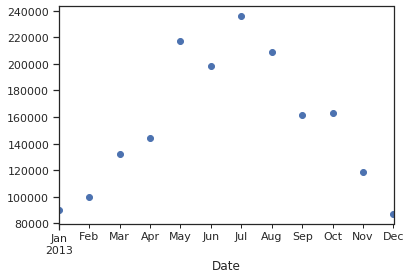

In [3]:
# For simplicity, let's just grab a few weeks and look at the total
df = raw_df.resample('MS').sum()
df = df.loc['2013-01-01':'2013-12-31', 'Fremont Bridge Total']
df.plot(marker='o', linestyle='None')

In [4]:
resampled_df = df.resample('D')

## Nearest-neighbor interpolation

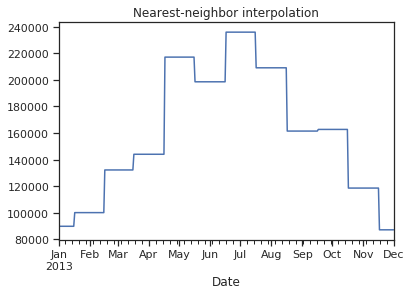

In [5]:
interpolated_df = resampled_df.interpolate(
    method='nearest'
)
interpolated_df.plot(
    title='Nearest-neighbor interpolation'
)

## Linear Interpolation

This looks like connecting a line between known points.

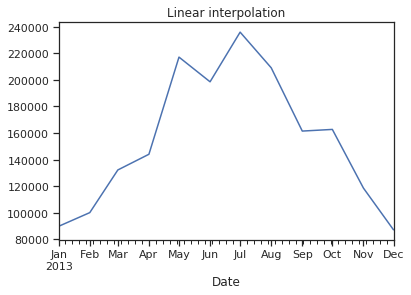

In [6]:
interpolated_df = resampled_df.interpolate(
    method='linear',
)
interpolated_df.plot(
    title='Linear interpolation'
)

## Cubic Spline Interpolation


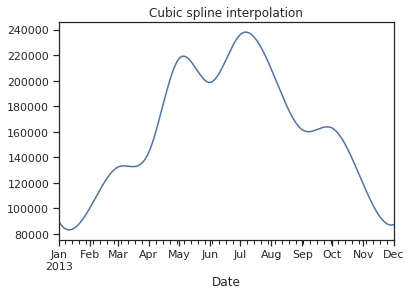

In [7]:
interpolated_df = resampled_df.interpolate(
    method='cubic',
)
interpolated_df.plot(
    title='Cubic spline interpolation'
)

## Piecewise Cubic Hermite Interpolating Polynomial (PCHIP)

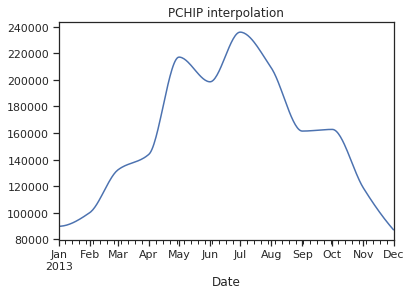

In [8]:
interpolated_df = resampled_df.interpolate(
    method='pchip',
)
interpolated_df.plot(
    title='PCHIP interpolation'
)

## Plot all methods together

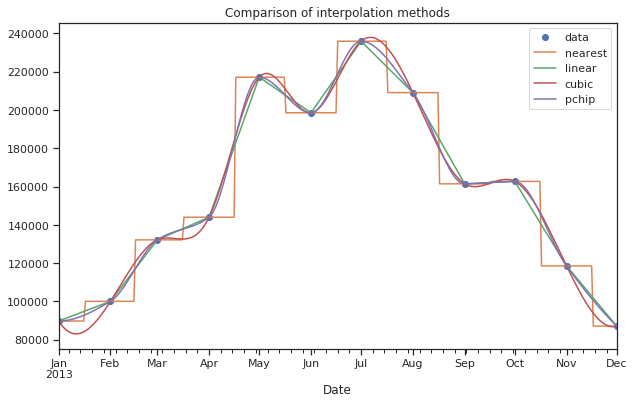

In [9]:
methods = ['nearest', 'linear', 'cubic', 'pchip']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot raw data
df.plot(marker='o', linestyle='None', ax=ax)

# Plot interpolations
for method in methods:
    interpolated_df = resampled_df.interpolate(
        method=method,
    )
    interpolated_df.plot(ax=ax)

plt.title('Comparison of interpolation methods')
plt.legend(['data'] + methods,
           loc='upper right')